<a href="https://colab.research.google.com/github/BelchaV/Chalenge1_Alura/blob/main/Chalenge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extraer la Data

In [31]:
import requests
import pandas as pd
#url= "https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json"
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
respuesta = requests.get(url)
data = respuesta.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


###Normalizo la data

In [32]:
df_normal=pd.json_normalize(data)
df_normal.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


# Transformo la Data

In [33]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [34]:
df_normal.rename(columns={
    "customer.gender": "genero",
    "customer.SeniorCitizen": "jubilado",
    "Partner": "enpareja",
    "account.Contract": "tipo_contrato",
    "account.PaymentMethod": "forma_pago",
    "account.PaperlessBilling": "fact_electronica",
    "account.Charges.Monthly": "cargo_mensual",
     "account.Charges.Total": "cargo_total"
}, inplace=True)
df_normal.head()

,customerID,Churn,genero,jubilado,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,tipo_contrato,fact_electronica,forma_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [35]:
df_normal.rename(columns={
    "customer.Partner": "enpareja",
    "customer.Dependents": "otros_servicios",
    "Churn": "desercion",
    "customer.tenure": "meses_de_servicio"
}, inplace=True)
df_normal.head()

,customerID,desercion,genero,jubilado,enpareja,otros_servicios,meses_de_servicio,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,tipo_contrato,fact_electronica,forma_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [36]:
#Duplicados
print("Cant de filas duplicadas:",df_normal.duplicated().sum())
#Columnas con valores nulos encontrados
print("detalle las columnas que contengan valores nulos(sumatoria)\n", df_normal.isnull().sum())

Cant de filas duplicadas: 0
detalle las columnas que contengan valores nulos(sumatoria)
 customerID                   0
desercion                    0
genero                       0
jubilado                     0
enpareja                     0
otros_servicios              0
meses_de_servicio            0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
tipo_contrato                0
fact_electronica             0
forma_pago                   0
cargo_mensual                0
cargo_total                  0
dtype: int64


In [37]:
#Como .isnull() solo detecta NaN, con lo siguiente detectamos: cadenas vacias(""), o columnas con espacios(" ")
df_normal.apply(lambda x:x.astype(str).str.strip() == '').sum()

,0
customerID,0
desercion,224
genero,0
jubilado,0
enpareja,0
otros_servicios,0
meses_de_servicio,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [38]:
#Formas de revisar que valores supuestos tiene la columna
df_normal["desercion"].isin(["Yes", "No"]).all()

np.False_

In [39]:
#Reviso ciertas columnas que podrían estar relacionadas con los valores vacios de la columna 'desercion', para intentar buscar alguna correspondencia pero ...no la veo
(df_normal["desercion"] == "").sum()
df_normal[df_normal["desercion"] == ""][["tipo_contrato", "meses_de_servicio"]]
#


,tipo_contrato,meses_de_servicio
30,Month-to-month,11
75,Two year,71
96,One year,29
98,Month-to-month,5
175,One year,65
...,...,...
7158,One year,14
7180,Month-to-month,49
7211,Month-to-month,9
7239,Two year,67


### La columna queda como 'Yes' o 'No'. (1er paso)

In [40]:
#revisamos cuantos valores unicos tiene la columna
print("antes...")
print(df_normal["desercion"].unique())
#
#asumimos entonces que un valor vacio corresponde a un "No" desertó
df_normal["desercion"] = df_normal["desercion"].replace("", "No")
print("despues...")
print(df_normal["desercion"].unique())

antes...
['No' 'Yes' '']
despues...
['No' 'Yes']


In [41]:
#Para chequear que tipo de dato encuentro en estas columnas (por la revisión se que son 2 o 3 valores)
columnas_a_verificar = ["desercion", "genero", "enpareja", "otros_servicios","phone.PhoneService", "phone.MultipleLines", "internet.OnlineBackup", "internet.DeviceProtection",
                        "internet.TechSupport", "internet.StreamingTV", "internet.StreamingMovies", "internet.OnlineSecurity", "fact_electronica"]

for col in columnas_a_verificar:
    print(col)
    print(df_normal[col].unique())


desercion
['No' 'Yes']
genero
['Female' 'Male']
enpareja
['Yes' 'No']
otros_servicios
['Yes' 'No']
phone.PhoneService
['Yes' 'No']
phone.MultipleLines
['No' 'Yes' 'No phone service']
internet.OnlineBackup
['Yes' 'No' 'No internet service']
internet.DeviceProtection
['No' 'Yes' 'No internet service']
internet.TechSupport
['Yes' 'No' 'No internet service']
internet.StreamingTV
['Yes' 'No' 'No internet service']
internet.StreamingMovies
['No' 'Yes' 'No internet service']
internet.OnlineSecurity
['No' 'Yes' 'No internet service']
fact_electronica
['Yes' 'No']


In [42]:
#estas otras columnas las reviso porque se que tienen pocos valores como posibles, pero no se cuantos...
columnas_a_verificar = ["internet.InternetService", "forma_pago"]
for col in columnas_a_verificar:
  print(col)
  print(df_normal[col].nunique())
  print(df_normal[col].unique())


internet.InternetService
3
['DSL' 'Fiber optic' 'No']
forma_pago
4
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


### Transformo columnas en Booleanas (si corresponde)

In [43]:
#para ML o Análisis, para Estadística, conviene tener esas columnas con valores númericos 0 y 1
columnas_a_verificar = ["desercion", "enpareja", "otros_servicios","phone.PhoneService",'fact_electronica']
for col in columnas_a_verificar:
    print(col)
    df_normal[col] = df_normal[col].map({"Yes": 1, "No": 0})

desercion
enpareja
otros_servicios
phone.PhoneService
fact_electronica


### Transformo columnas en numéricas (si corresponde)

In [44]:
df_normal.head()

,customerID,desercion,genero,jubilado,enpareja,otros_servicios,meses_de_servicio,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,tipo_contrato,fact_electronica,forma_pago,cargo_mensual,cargo_total
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4


In [45]:
df_normal['cargo_total'] = pd.to_numeric(df_normal['cargo_total'], errors='coerce')
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   desercion                  7267 non-null   int64  
 2   genero                     7267 non-null   object 
 3   jubilado                   7267 non-null   int64  
 4   enpareja                   7267 non-null   int64  
 5   otros_servicios            7267 non-null   int64  
 6   meses_de_servicio          7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [46]:
#Creamos una nueva columna, para el valor diario de cargos
df_normal['cuentas_diarias']=df_normal['cargo_mensual'] /30
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   desercion                  7267 non-null   int64  
 2   genero                     7267 non-null   object 
 3   jubilado                   7267 non-null   int64  
 4   enpareja                   7267 non-null   int64  
 5   otros_servicios            7267 non-null   int64  
 6   meses_de_servicio          7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [47]:
#Cambio otros nombres de columnas que pueden no entenderse (segun el pais)
df_normal.rename(columns={
    "phone.MutipleLines": "tiene_mult_lineas",
    "phone.PhoneService": "tiene_telefonia",
    "internet.InternetService": "tiene_internet",
    "internet.OnlineSecurity": "serv_seguridad_enlinea",
    "internet.OnlineBackup": "serv_respaldo_enlinea",
    "internet.DeviceProtection": "serv_protec_dispositivo",
    "internet.TechSupport": "serv_adic_soporte_tecn",
    "internet.StreamingTV": "tiene_tv_cable",
    "internet.StreamingMovies": "serv_streaming_pelic",
}, inplace=True)
df_normal.head()

,customerID,desercion,genero,jubilado,enpareja,otros_servicios,meses_de_servicio,tiene_telefonia,phone.MultipleLines,tiene_internet,...,serv_protec_dispositivo,serv_adic_soporte_tecn,tiene_tv_cable,serv_streaming_pelic,tipo_contrato,fact_electronica,forma_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [48]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               7267 non-null   object 
 1   desercion                7267 non-null   int64  
 2   genero                   7267 non-null   object 
 3   jubilado                 7267 non-null   int64  
 4   enpareja                 7267 non-null   int64  
 5   otros_servicios          7267 non-null   int64  
 6   meses_de_servicio        7267 non-null   int64  
 7   tiene_telefonia          7267 non-null   int64  
 8   phone.MultipleLines      7267 non-null   object 
 9   tiene_internet           7267 non-null   object 
 10  serv_seguridad_enlinea   7267 non-null   object 
 11  serv_respaldo_enlinea    7267 non-null   object 
 12  serv_protec_dispositivo  7267 non-null   object 
 13  serv_adic_soporte_tecn   7267 non-null   object 
 14  tiene_tv_cable          

## Analisis de los Datos

In [49]:
df_normal.describe()

,desercion,jubilado,enpareja,otros_servicios,meses_de_servicio,tiene_telefonia,fact_electronica,cargo_mensual,cargo_total,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


Una simple mirada del 'describe' nos indica:
+ la media (mean) indica que hay un 75% aprox que se quedan con los Servicios.
+ los jubilados son un 16% aprox
+ casi la mitad de los clientes estan en pareja
+ el 70% NO posee otros servicios
+ el 90% NO paga telefonía
+ Casi el 60% prefiere Fact que le llega por Mail
+ Hay mas Clientes 'menos' antiguos
+ Se paga un promedio mensual de 64 (digamos mas clientes con servicios adicionales).
+ El que menos paga, paga 18.  Y el que mas 118 aprox


In [50]:
# Encontré valores NAN en la columna 'cargo_total'.  Lo cambio por 0.
df_normal['cargo_total'].isnull().sum()
df_normal["cargo_total"] = df_normal["cargo_total"].fillna(0)

### Graficando y deduciendo realidades...

In [51]:
import plotly.express as px
px.histogram(df_normal, x='genero', text_auto=True, color='desercion', barmode='group')
#La deserción ( si(1) o no(0) ) es similar entre mujeres y varones.  Nada concluyente. Hay una deserción del 26% aprox

In [52]:
#px.histogram(df_normal, x='jubilado', text_auto=True, color='desercion', barmode='group')
tabla = df_normal.groupby(['jubilado','desercion']).size().reset_index(name='cantidad')
tabla['total'] = tabla.groupby('jubilado')['cantidad'].transform('sum')
tabla['porcentaje'] = (tabla['cantidad'] / tabla['total']) * 100
#tabla.head()
px.histogram(tabla, x='jubilado', y='porcentaje',  color='desercion', barmode='group', text_auto='.2f')
#Los clientes jubilados son un 16% aprox.
#La deserción en este caso de NO Jubilados es del 22% aprox.  En el caso de los Jubilados es del 40% aprox

In [53]:
px.histogram(df_normal, x='enpareja', text_auto=True, color='desercion', barmode='group')
#En los Solitarios la Deserción es del 32% .  En los Emparejados la deserción es del 19% aprox

In [54]:
px.histogram(df_normal, x='tipo_contrato', text_auto=True, color='desercion', barmode='group')
#El Contrato MesxMes es el mas volatil.  Deserta un 41.3%.
#El contrato mas estable es el de '2 años'. Deserta un 2.7%

In [55]:
px.histogram(df_normal, x='forma_pago', text_auto=True, color = 'desercion',  barmode ='group')
#Las formas de pago se parecen en cuanto a la Cantidad por Tipo.
#Los que pagan por Billetera Virtual (asumo) son los más vólariles (los que mas desertan, un 43.7% aprox)

In [56]:
px.histogram(df_normal, x='tiene_internet', text_auto=True, color = 'desercion',  barmode ='group')
#Los que contratan Fibra son los mas volátiles (desertan mas). Son mas exigentes. Los que NO tienen internet parece que no están tan pendientes de Servicio (no desertan)
#se podría analizar si los que tienen Fibra, son clientes de mas antiguedad (mas meses de contrato

In [57]:
px.histogram(df_normal, x='meses_de_servicio', text_auto=True, color='desercion', barmode='group')
#Hay muchos que contratan y abondonan en los primeros meses. La desercion decae con el tiempo

In [58]:
df_agrup= df_normal.groupby(['meses_de_servicio','desercion']).size().unstack(fill_value=0)
df_agrup['porc_desercion'] = (df_agrup.get(1,0) / df_agrup.sum(axis=1)) * 100
#df_agrup
#Se puede visualizar "como cae la deserción cuando aumentan los meses de servicio"
px.line(df_agrup.reset_index(), x ='meses_de_servicio', y='porc_desercion', markers=True, title='Tasa de Desercion x mes')

In [59]:
#px.scatter(df_normal, x='meses_de_servicio', y='cargo_mensual', color='desercion', title='MesesdeContrato vs CargosMensuales identificando Deserciones')
px.box(df_normal, x='desercion', y = 'cargo_mensual', color='desercion')
#Este gráfico de Bigote muestra que Q1,Q2,Q3 que representa lo que gasta el cliente mensualmente "son menores para los que NO desertan".  Es decir pagan menos (el 25%, la mediana, el 75%)

In [64]:
#df_normal[desercion].describe()
#esta correlación indica que a medida que mas paga el cliente, la deserción tiende a bajar ligeramente (y viceversa).
ind_corr = df_normal['desercion'].corr(df_normal['cargo_total'])
print(ind_corr)

-0.19334460673450496


In [69]:
#Podría indicar que clientes con más 'cuentas_diarias' tienen una leve tendencia a desertar más, pero el efecto no es fuerte y podría deberse a otros factores.
#Hay una tendencia positiva débil, pero no es suficiente para decir que 'cuentas_diarias' predice 'desercion' de forma confiable.
ind_corr = df_normal['desercion'].corr(df_normal['cuentas_diarias'])
print(ind_corr)
#matriz_corr=df_normal.corr()

0.1898657177458538


In [70]:
#El valor de Correlación 0.34 es el mas relevante (más meses_de_servicio, menos probabilidad de desercion (en promedio)).
#Es una relación moderada (no tan débil como 0.19, pero tampoco muy fuerte; usualmente consideramos moderada entre 0.3 y 0.5).
#La Interpretación es:  Clientes que llevan más tiempo en el servicio tienden a desertar menos. Esto podría sugerir fidelización con el tiempo o que quienes sobreviven los primeros meses tienden a quedarse más.
df_num = df_normal.select_dtypes(include=['number'])
matriz_corr=df_num.corr()
corr_sorted = matriz_corr['desercion'].sort_values(ascending=False)
print("📊 Correlaciones con Desercion")
print(corr_sorted)


📊 Correlaciones con Desercion
desercion            1.000000
cuentas_diarias      0.189866
cargo_mensual        0.189866
fact_electronica     0.186666
jubilado             0.146733
tiene_telefonia      0.012571
enpareja            -0.148546
otros_servicios     -0.161384
cargo_total         -0.193345
meses_de_servicio   -0.344079
Name: desercion, dtype: float64


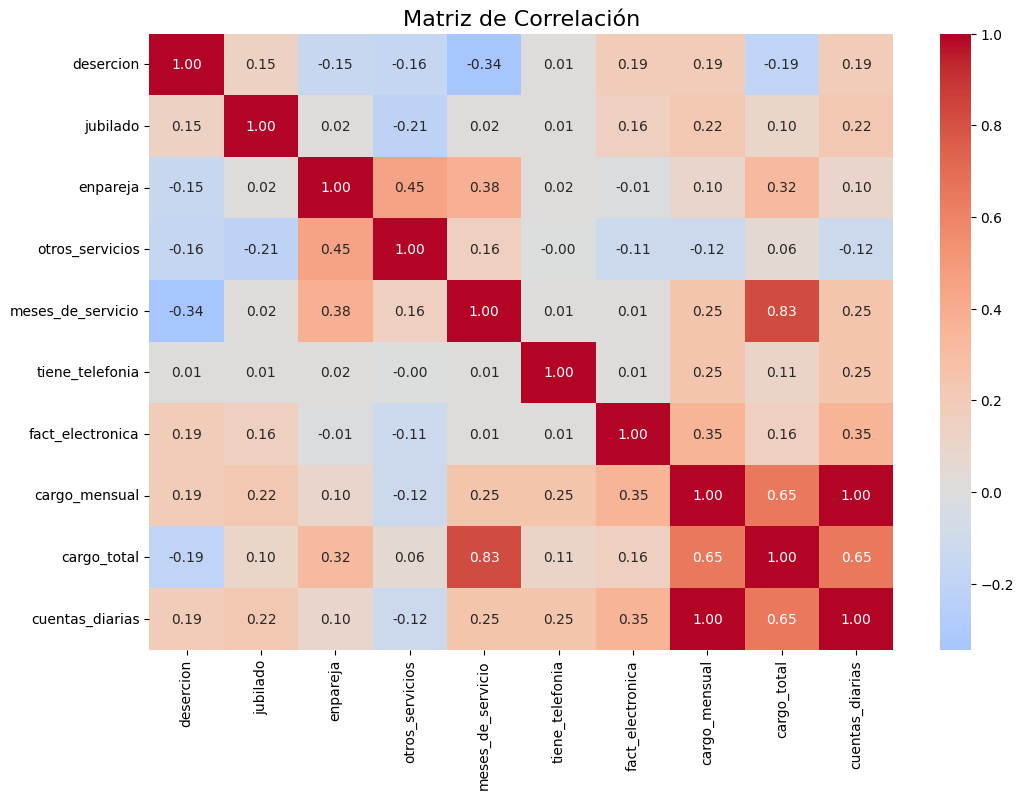

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(
    matriz_corr,
    annot=True,        # Mostrar valores
    fmt=".2f",         # 2 decimales
    cmap='coolwarm',   # Colores
    center=0           # Centrar en 0
)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

## INFORME FINAL

🔹 **Introducción**:
La empresa enfrenta una alta tasa de cancelaciones (un 25% aprox según una primera verificación).  
Se  necesita comprender los factores que llevan a la pérdida de clientes.  
Haremos un recopilación, procesamiento y análisis de los datos para poder extraer la información que nos sirva para dar una Conclusión y Recomendaciones al Cliente.   
Los datos formateados y analizados serán muy útiles para una 2da instancia que llevará a cabo el equipo de Data Science.  
La estrategia es poder construir Modelos Predictivos que nos ayuden a 'reducir la evasión (deserción) de clientes de la Telefónica.

🔹 **Limpieza y Tratamiento de Datos**: La Data inicialmente se encuentra en format Json.  Lo transformamos a un Dataframe que nos permitirá 'ejecutar múltiples acciones con los datos.  
Próximo es 'normalizar los datos' para que queden estructurados en formato de Tabla (filas y columnas).  
Cada columna tiene su 'rótulo'. Le damos 'legibilidad' cambiando los 'nombres de los rótulos' a nuestro idioma.  
Cada columna tiene su 'tipo de dato'. Debemos ajustar esos tipos. Puede ser cambiar de 'object' a 'int'. En otros casos pasarlos a 'float'. También ajustar el ancho, puede ser int o float 16,32,64,etc.  
Hay que 'explorar las filas' para evitar (eliminar) filas duplicadas.  
Hay que 'explorar las columnas de texto'  para evitar 'NaN', cadenas vacías ("") y cadenas con espacios(" ")  
Las columnas que son binarias (ej: 'yes' o 'no') tienen que ser convertidas a númericas (0 y 1).  Esto será agradecido por el equipo de DataScience.  
Las columnas con 'datos categóricos' también tenemos que analizarlos.  Porque podemos encontrar algun 'dato raro' (fuera de lógica).

🔹 **Análisis Exploratorio de Datos**: Realicé varios gráficos que nos ayudan a identificar patrones.
Utilicé la libreria Plotly Express que es una biblioteca para visualización de datos de 'alto nivel'.
Los histogramas, gráficos de dispersión, de lineas y diagramas de caja construidos nos dan claramente las señales de que variables hay que prestarles atención para mitigar o reducir la tasas de deserciones (churn).


🔹 **Conclusiones e Insights**: los principales hallazgos -las columnas o variables que son atractivas- nos ayudarán a buscar las estrategias para reducir la evasión o deserción de clientes.

Hice un 'describe' de la data. Y una primera impresión nos dice:
+ la media (mean) indica que hay un 75% aprox que se quedan con los Servicios.
+los jubilados son un 16% aprox
+casi la mitad de los clientes estan en pareja
+el 70% NO posee otros servicios
+el 90% NO paga telefonía
+Casi el 60% prefiere Fact que le llega por Mail
+Hay mas Clientes 'menos' antiguos
+Se paga un promedio mensual de 64 (digamos mas clientes con servicios adicionales).
+El que menos paga, paga 18. Y el que mas 118 aprox

Estas variables nos dan buenos indicios:
+ Variable: en_pareja   
En los Solitarios -solteros- la Deserción es del 32% .   
En los Emparejados la deserción es del 19% aprox.
+ Variable: tipo_contrato  
El Contrato MesxMes es el mas volatil.  Deserta un 41.3%.  
El contrato mas estable es el de '2 años'. Deserta un 2.7%
+ Variable: forma_pago  
Los que pagan por Billetera Virtual (asumo) son los más vólariles (los que mas desertan, un 43.7% aprox).
+ Variable: tiene_internet  
Los que contratan Fibra son los mas volátiles (desertan mas). Son mas exigentes.  
Los que NO tienen internet parece que no están tan pendientes de Servicio (no desertan).
+ Variable: meses_de_servicio  
Hay muchos que contratan y abondonan en los primeros meses.  
La desercion decae con el tiempo.


🔹 Recomendaciones:   
+ La variable "meses_de_servicio" es la más reveladora. Podría ser la Variable Predictora en Módelos de ML a construir.
+ Calificación de los Servicios. Sería una columna faltante. Vacio=no calificó, 1 a 5 ej: medida de satisfacción
+ Un variable que podría servir es: cuantos_comparten. Si es una Familia, es mas dificil ponerse de acuerdo para cortar el servicio.
+ Alternativa: se podría analizar si los que tienen Fibra, son clientes de mas antiguedad (mas meses de contrato).
+ Armar un DataFrame Final solo con las Variables que van a ser Importantes para el CientifDatos (para hacer Modelos Predictivos)

